In [198]:
library("tidymodels")
library("tidyverse")
library("stringr")
library(patchwork)

In [3]:
seoul_bike_df<-read.csv("cleaned_seoul_bike_sharing.csv")
head(seoul_bike_df)

,DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
3,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
4,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
5,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
6,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


In [4]:
# remove DATE and FUNCTIONING_DAY collumn
seoul_bike_df<- seoul_bike_df %>% select(-DATE,-FUNCTIONING_DAY)

We won't be using the `DATE` and `FUNCTIONING_DAY` column, because `DATE`' is basically acts like an data entry index,while `FUNCTIONING_DAY` only has one distinct value remaining (`YES`) after missing value processing

### Convert HOUR, HOLIDAY, and SEASONS  columns into indicator columns.


In [5]:
# convert hour collumn into indicator collumn
hour_indicator_df<-seoul_bike_df %>%
mutate(dummy= 1) %>%
spread(key=HOUR,
        value= dummy,
         fill= 0)

#convert HOLIDAY collumn into indicator collumn
holiday_indicator_df<-hour_indicator_df %>%
mutate(dummy=1)%>%
spread(key=HOLIDAY,
        value= dummy,
         fill= 0)

#convert SEASONS collumn into indicator collumn
converted_bike_sharing_df<-holiday_indicator_df %>%
mutate(dummy= 1) %>%
spread(key=SEASONS,
        value= dummy,
         fill= 0)

#standardize the collumn names by converting all collumn names to uppercase
colnames(holiday_indicator_df)<- toupper(colnames(holiday_indicator_df))
#colnames(converted_bike_sharing_df)<- toupper(colnames(converted_bike_sharing_df))

#print the structure
str(converted_bike_sharing_df)

'data.frame':	8465 obs. of  39 variables:
 $ RENTED_BIKE_COUNT    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ TEMPERATURE          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : int  37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ DEW_POINT_TEMPERATURE: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 0                    : num  1 0 0 0 0 0 0 0 0 0 ...
 $ 1                    : num  0 1 0 0 0 0 0 0 0 0 ...
 $ 2                    : num  0 0 1 0 0 0 0 0 0 0 ...
 $ 3                    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ 4                    : num  0 0 0 0 1 0 0 0 0 0 ...
 $ 5                    : num  0 0 0 0 

### Normalize data

In [118]:
# min max normalization Function
min_max<-function(x){
    return((x-min(x))/(max(x)-min(x)))
    }
normalized_bike_sharing<-converted_bike_sharing_df %>% mutate(TEMPERATURE=min_max(TEMPERATURE),
                          HUMIDITY=min_max(HUMIDITY),
                          WIND_SPEED=min_max(WIND_SPEED),
                          VISIBILITY=min_max(VISIBILITY),
                          DEW_POINT_TEMPERATURE=min_max(DEW_POINT_TEMPERATURE),
                          SOLAR_RADIATION=min_max(SOLAR_RADIATION),
                          RAINFALL=min_max(RAINFALL),
                          SNOWFALL=min_max(SNOWFALL)) 

normalized_bike_sharing_2<-holiday_indicator_df %>% mutate(TEMPERATURE=min_max(TEMPERATURE),
                          HUMIDITY=min_max(HUMIDITY),
                          WIND_SPEED=min_max(WIND_SPEED),
                          VISIBILITY=min_max(VISIBILITY),
                          DEW_POINT_TEMPERATURE=min_max(DEW_POINT_TEMPERATURE),
                          SOLAR_RADIATION=min_max(SOLAR_RADIATION),
                          RAINFALL=min_max(RAINFALL),
                          SNOWFALL=min_max(SNOWFALL)) 

summary(normalized_bike_sharing)

 RENTED_BIKE_COUNT  TEMPERATURE        HUMIDITY        WIND_SPEED    
 Min.   :   2.0    Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 214.0    1st Qu.:0.3636   1st Qu.:0.4286   1st Qu.:0.1216  
 Median : 542.0    Median :0.5472   Median :0.5816   Median :0.2027  
 Mean   : 729.2    Mean   :0.5345   Mean   :0.5933   Mean   :0.2332  
 3rd Qu.:1084.0    3rd Qu.:0.7080   3rd Qu.:0.7551   3rd Qu.:0.3108  
 Max.   :3556.0    Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   VISIBILITY     DEW_POINT_TEMPERATURE SOLAR_RADIATION       RAINFALL       
 Min.   :0.0000   Min.   :0.0000        Min.   :0.000000   Min.   :0.000000  
 1st Qu.:0.4602   1st Qu.:0.4412        1st Qu.:0.000000   1st Qu.:0.000000  
 Median :0.8429   Median :0.6107        Median :0.002841   Median :0.000000  
 Mean   :0.7131   Mean   :0.5977        Mean   :0.161326   Mean   :0.004261  
 3rd Qu.:1.0000   3rd Qu.:0.7924        3rd Qu.:0.264205   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000        Ma

### Split the dataset into training and testing

In [7]:
set.seed(1234)
df_split <- initial_split(normalized_bike_sharing,prop=4/5)
train_data<- training(df_split)
test_data<- testing(df_split)

# define the linear regression model specification
lm_engine<- linear_reg() %>%
set_engine("lm") %>%
set_mode("regression")




### Build the linear regression model


In [8]:
#Linear regression model with weather variables only
lm_model_weather<- lm_engine %>%
    fit(RENTED_BIKE_COUNT~TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + 
        DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,data=train_data)
summary(lm_model_weather$fit)
#linear regression model with all variables
lm_model_all<-lm_engine %>%
fit(RENTED_BIKE_COUNT~.,data=train_data)
summary(lm_model_all$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1334.10  -292.54   -57.78   207.94  2333.89 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             171.70      56.12   3.060  0.00222 ** 
TEMPERATURE            2356.96     252.22   9.345  < 2e-16 ***
HUMIDITY               -936.06     122.34  -7.652 2.26e-14 ***
WIND_SPEED              385.61      46.33   8.323  < 2e-16 ***
VISIBILITY                7.81      24.00   0.325  0.74492    
DEW_POINT_TEMPERATURE  -275.83     268.82  -1.026  0.30490    
SOLAR_RADIATION        -441.33      33.43 -13.202  < 2e-16 ***
RAINFALL              -1789.73     181.18  -9.878  < 2e-16 ***
SNOWFALL                312.05     126.92   2.459  0.01397 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1396.06  -217.63    -7.03   201.50  1798.67 

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             315.83      50.63   6.238 4.69e-10 ***
TEMPERATURE             789.85     204.31   3.866 0.000112 ***
HUMIDITY               -887.07      95.92  -9.248  < 2e-16 ***
WIND_SPEED               13.72      38.75   0.354 0.723277    
VISIBILITY               18.20      19.56   0.930 0.352196    
DEW_POINT_TEMPERATURE   602.49     213.16   2.827 0.004719 ** 
SOLAR_RADIATION         271.86      39.98   6.800 1.14e-11 ***
RAINFALL              -2095.13     142.03 -14.752  < 2e-16 ***
SNOWFALL                230.03      99.82   2.304 0.021226 *  
`0`                    -120.36      32.11  -3.748 0.000180 ***
`1`                    -224.29      31.88  -7.035 2.19e-12 ***
`2`                  

### Generate test results

In [235]:
#generate test results from linear regression model with weather related variables only
weather_test_result<-lm_model_weather %>%
predict(new_data=test_data) %>%
mutate(truth= test_data$RENTED_BIKE_COUNT)
head(weather_test_result)

# generate test results from linear regression model with all variables
all_test_result<-lm_model_all %>%
predict(new_data=test_data) %>%
mutate(truth= test_data$RENTED_BIKE_COUNT)
head(all_test_result)

.pred,truth
<dbl>,<int>
317.21735,100
321.47531,181
591.78405,360
17.92040,405
-67.70542,328
519.48746,479


Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"


.pred,truth
<dbl>,<int>
-179.55574,100
-17.38191,181
220.94815,360
466.76903,405
-78.68774,328
288.29215,479


### Evaluate the model

In [206]:
#Calculate the R-squared from linear model with weather variables only
rsq(weather_test_result,truth=truth,estimate=.pred)

#Calculate the R-squared from linear model with all variables
rsq(all_test_result,truth=truth,estimate=.pred)

#calculate the Root Mean square from linear model with weather variables only
rmse(weather_test_result,truth=truth,estimate=.pred)

#calculate the Root Mean square from linear model with all variables 
rmse(all_test_result,truth=truth,estimate=.pred)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.438825


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6697274


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,474.1716


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,363.737


From the tables above, we ca see that the test results `lm_model_all` peform much beter.

Since `lm_model_all` has many predictor variables, let's check which predictor variables have larger coefficients.

### Identify important variables

In [11]:
#retrieve the coefficient from lm_model_all
coeficient<-abs(lm_model_all$fit$coefficients)

#retrieve each collumn names
collumn<-colnames(converted_bike_sharing_df)

#combine the coefficient and collumn name into a dataframe
coefficient_df<-data.frame(variables=collumn,coefficients=coeficient)

#sort the dataframe in descending order using coefficient collumn
sorted_coefficient_df<-coefficient_df[order(-coefficient_df$coefficients),] 

#turned the missing value into 0
sorted_coefficient_df[is.na(sorted_coefficient_df)]<- 0
head(sorted_coefficient_df)

,variables,coefficients
,<chr>,<dbl>
RAINFALL,RAINFALL,2095.1299
HUMIDITY,HUMIDITY,887.0713
TEMPERATURE,TEMPERATURE,789.8480
`18`,18,689.2575
DEW_POINT_TEMPERATURE,DEW_POINT_TEMPERATURE,602.4932
`4`,4,483.1542


lets visualize the dataframe so we can identify important variables better

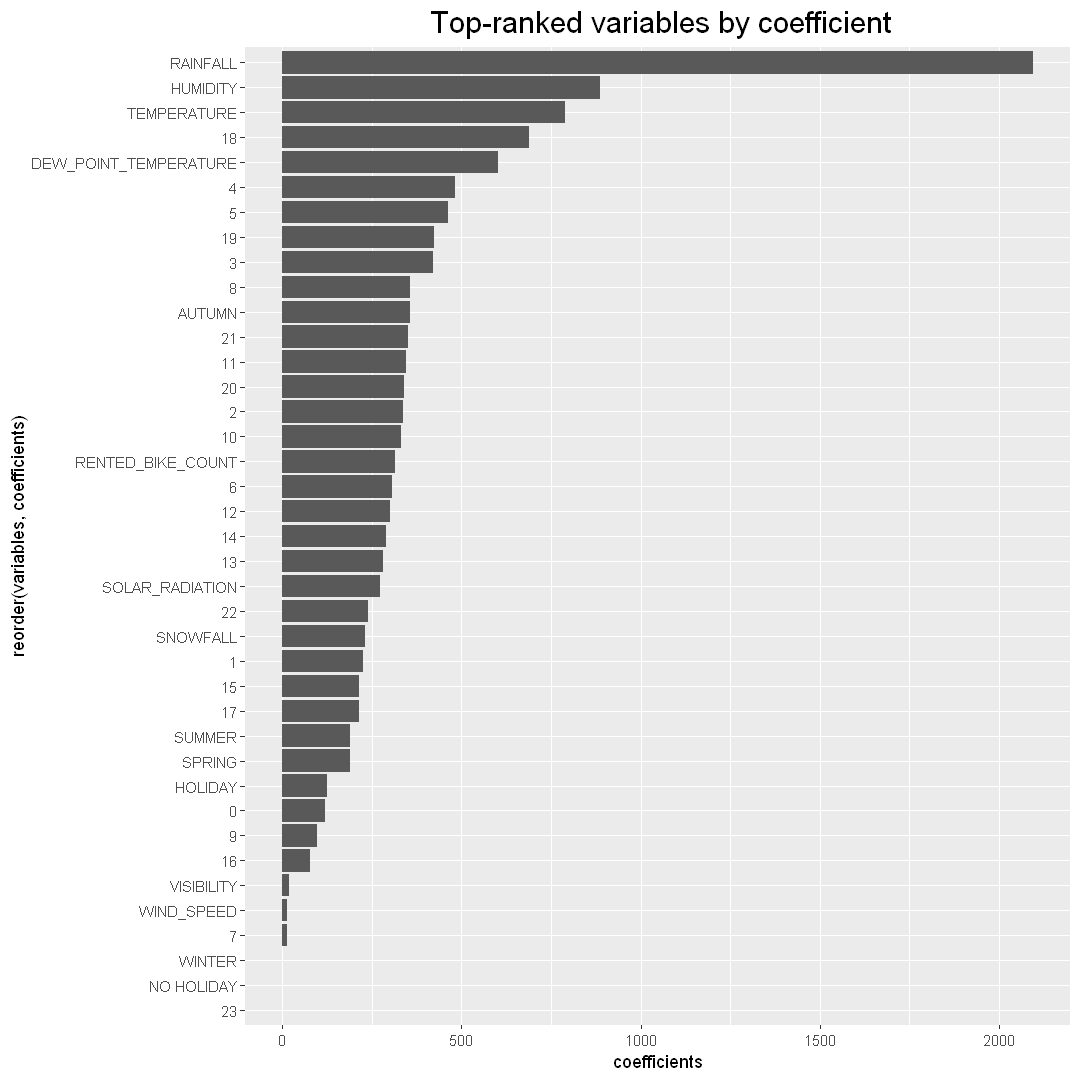

In [12]:
#visualize the dataframe
options(repr.plot.width=9, repr.plot.height=9)
ggplot(sorted_coefficient_df,aes(x=coefficients,y=reorder(variables,coefficients)))+
        geom_bar(stat="identity")+
        ggtitle("Top-ranked variables by coefficient")+
        theme(plot.title = element_text(size =18,hjust=0.51))

these `Top-ranked variables by coefficient` plot will be very usefull for model refinement in the next step

### Model refinement

Now lets refine the base regression model

Linear regression models are the most suitable models to capture linear correlation among variables. However in real world data,many relationships may be non linear

lets visualize the polynomial regression on the numerical variable to see the correlation of each variable

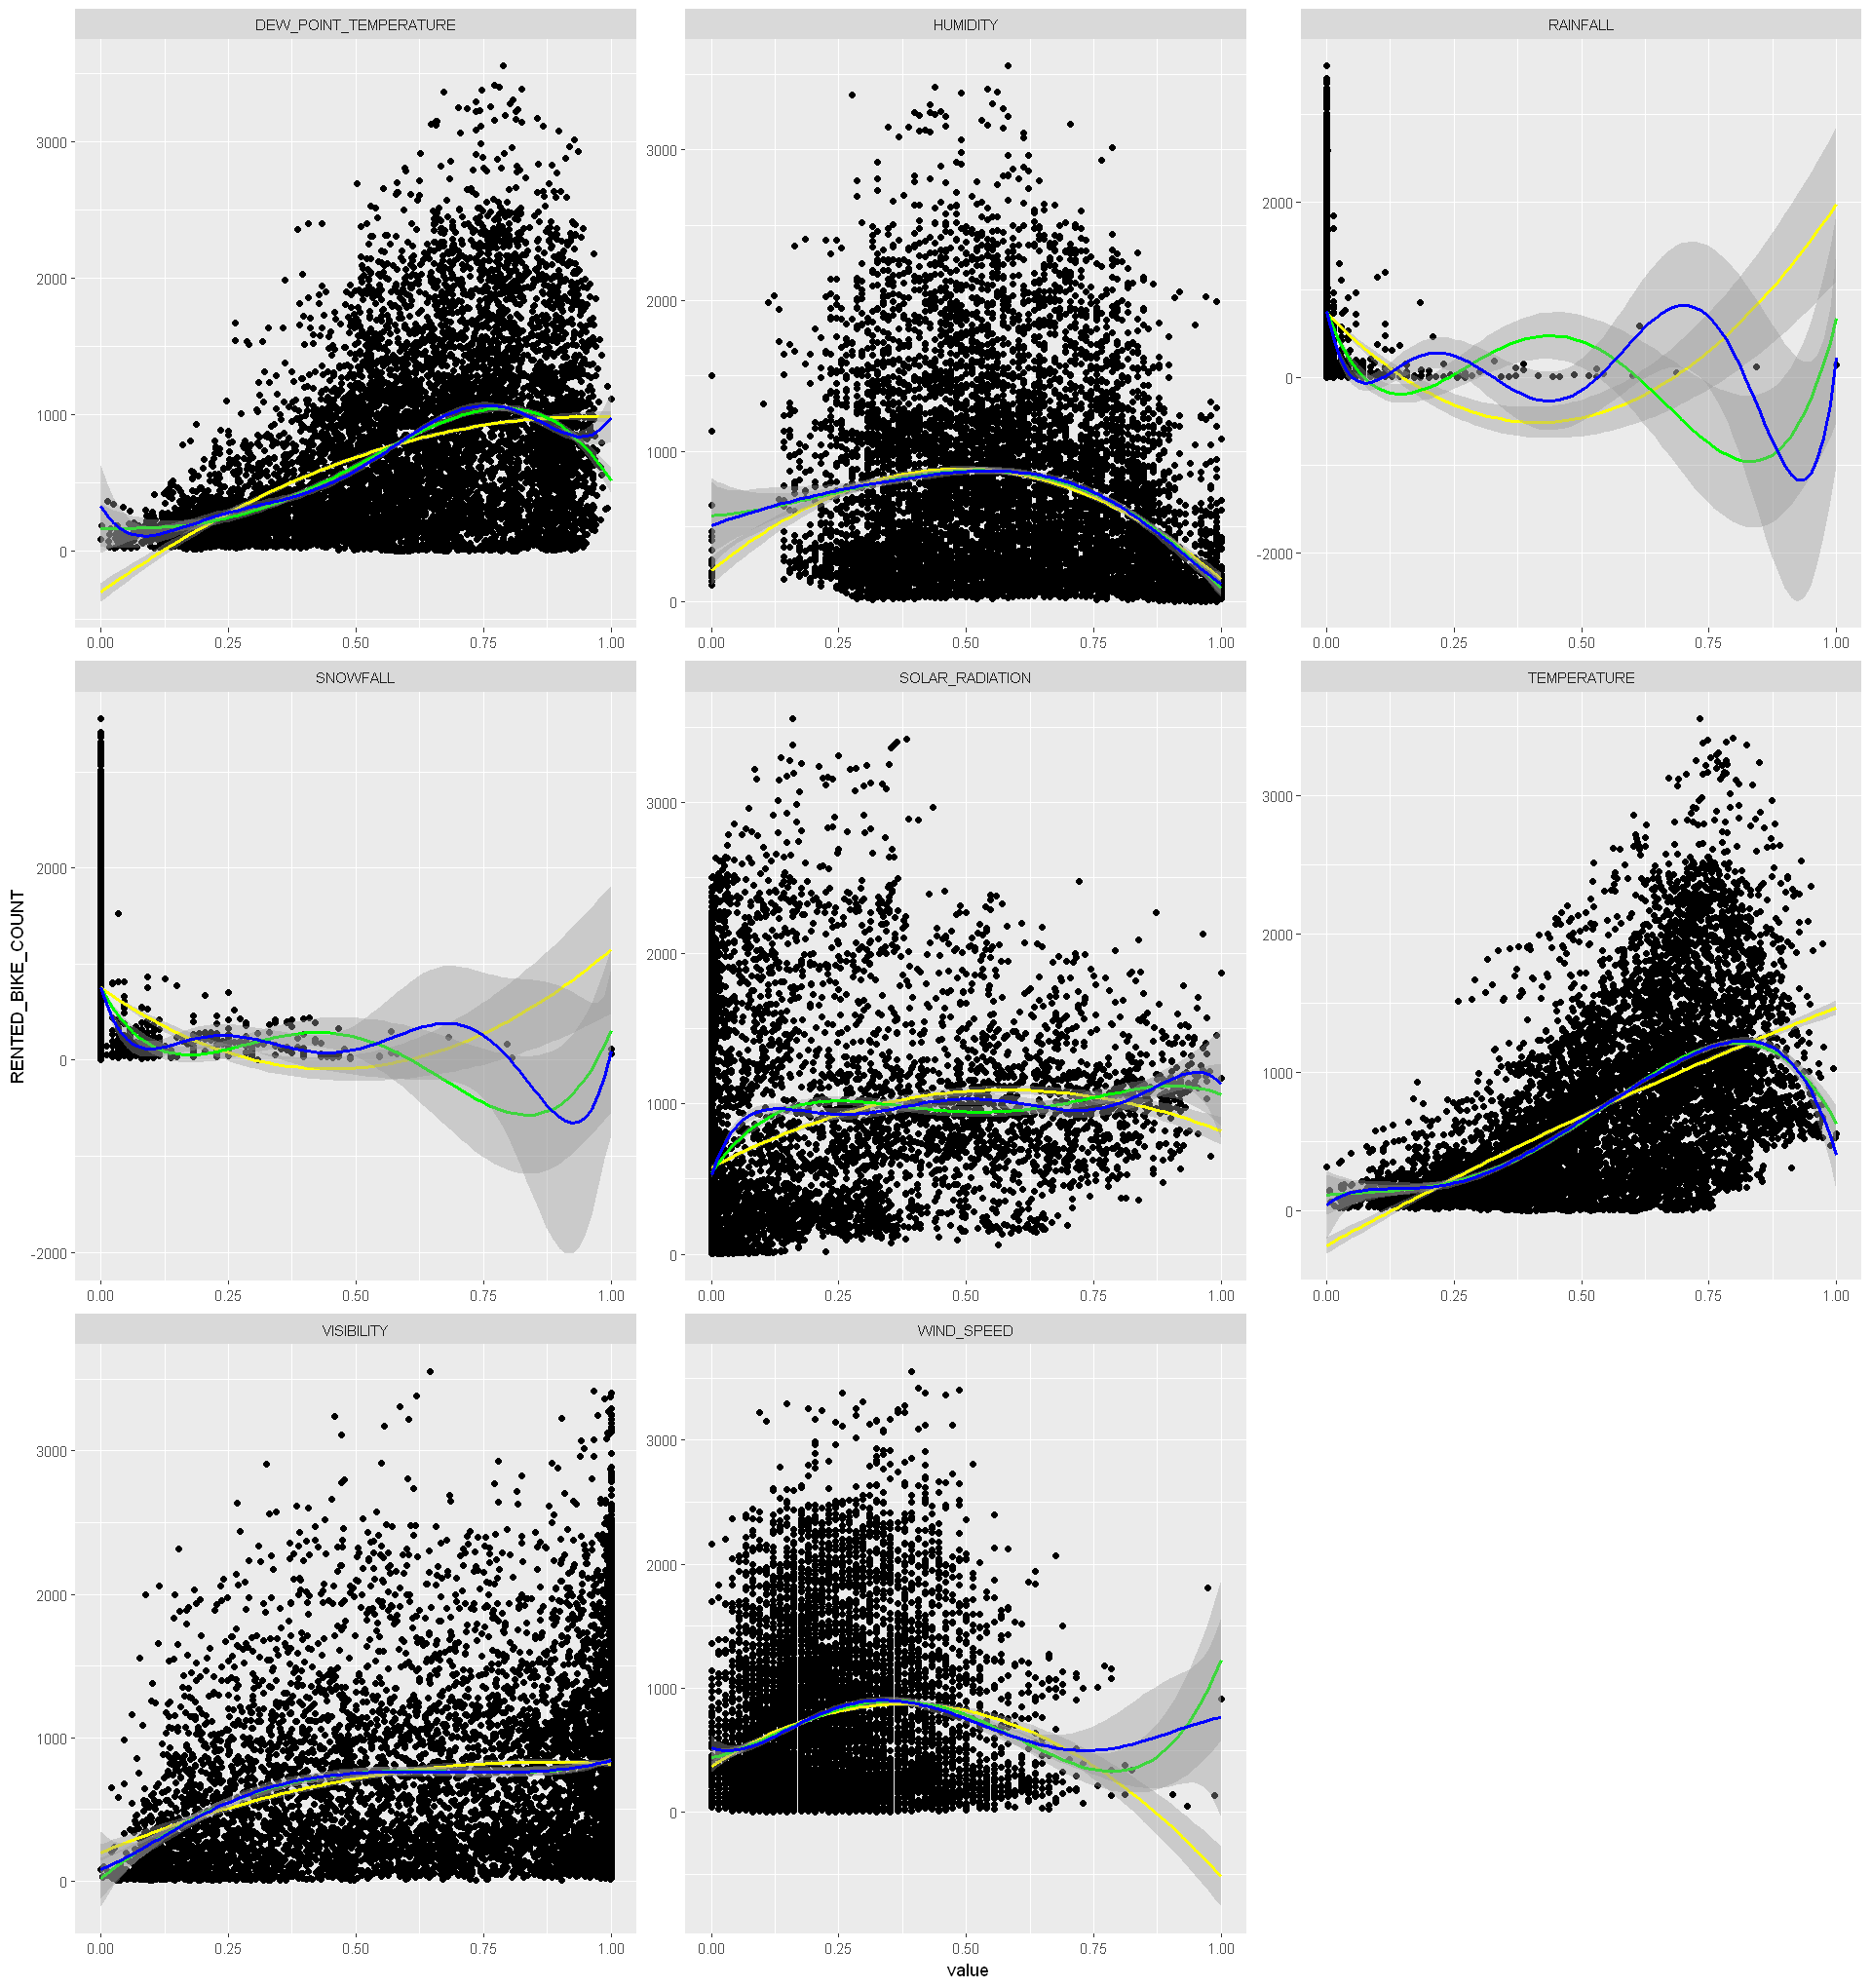

In [129]:
dropped_df<-normalized_bike_sharing [-10:-39] 
test_1<-dropped_df %>% gather(-RENTED_BIKE_COUNT,key='var',value='value')
                           
options(repr.plot.width=16, repr.plot.height=17)
ggplot(test_1,aes(y=RENTED_BIKE_COUNT,x=value))+
    geom_point()+
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), color="yellow") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 4), color="green") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 6), color="blue")+
    facet_wrap(vars(var),scales='free')

### Adding polynomial and interaction terms

now lets add polynomial and interaction terms based on the plot above

In [234]:
improved_model <-lm_engine %>%  fit(RENTED_BIKE_COUNT ~ poly(RAINFALL,4) * 
        poly(HUMIDITY,4) + `18`* poly(TEMPERATURE,4) *  poly(DEW_POINT_TEMPERATURE,6) +`19` + `8` + `21`+ 
        `20`+`4`+`5`+ AUTUMN + `22` + `3` + `17` * poly(SOLAR_RADIATION,4) * poly(SNOWFALL,2) + `11`+ 
        `10` + `2` + `12` + `6` + SUMMER + `14` + SPRING + `13` + HOLIDAY+ 
        `1`+`15`+`7`+`23`* poly(WIND_SPEED,4) +`16`* poly(VISIBILITY,4), data = train_data)

test_results0<-improved_model %>% predict(new_data=test_data) %>% mutate(truth=test_data$RENTED_BIKE_COUNT)
rsq(test_results,truth=truth,estimate=.pred)
rmse(test_results,truth=truth,estimate=.pred)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7761871


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,299.5252


### Add regularization
lets try to add regularization technique to reduce overfitting isues


In [217]:
#regularization specs
lasso_spec<-linear_reg(penalty = 4.52, mixture = 1) %>%
set_engine('glmnet')
ridge_spec<-linear_reg(penalty = 4.52, mixture = 0) %>%
set_engine('glmnet')
elastic_spec<-linear_reg(penalty = 4.52,mixture=0.3) %>%
set_engine("glmnet")

In [218]:
# model with lasso regularization
lasso_model<-lasso_spec %>% fit(RENTED_BIKE_COUNT ~ poly(RAINFALL,4) * 
        poly(HUMIDITY,4) + `18`* poly(TEMPERATURE,4) *  poly(DEW_POINT_TEMPERATURE,6) +`19` + `8` + `21`+ 
        `20`+`4`+`5`+ AUTUMN + `22` + `3` + `17` * poly(SOLAR_RADIATION,4) * poly(SNOWFALL,2) + `11`+ 
        `10` + `2` + `12` + `6` + SUMMER + `14` + SPRING + `13` + HOLIDAY+ 
        `1`+`15`+`7`+`23`* poly(WIND_SPEED,4) +`16`* poly(VISIBILITY,4), data = train_data)

# model with ridge regularization
ridge_model<-ridge_spec %>% fit(RENTED_BIKE_COUNT ~ poly(RAINFALL,4) * 
        poly(HUMIDITY,4) + `18`* poly(TEMPERATURE,4) *  poly(DEW_POINT_TEMPERATURE,6) +`19` + `8` + `21`+ 
        `20`+`4`+`5`+ AUTUMN + `22` + `3` + `17` * poly(SOLAR_RADIATION,4) * poly(SNOWFALL,2) + `11`+ 
        `10` + `2` + `12` + `6` + SUMMER + `14` + SPRING + `13` + HOLIDAY+ 
        `1`+`15`+`7`+`23`* poly(WIND_SPEED,4) +`16`* poly(VISIBILITY,4), data = train_data)

# model with elastic net
elastic_model<-elastic_spec %>% fit(RENTED_BIKE_COUNT ~ poly(RAINFALL,4) * 
        poly(HUMIDITY,4) + `18`* poly(TEMPERATURE,4) *  poly(DEW_POINT_TEMPERATURE,6) +`19` + `8` + `21`+ 
        `20`+`4`+`5`+ AUTUMN + `22` + `3` + `17` * poly(SOLAR_RADIATION,4) * poly(SNOWFALL,6) + `11`+ 
        `10` + `2` + `12` + `6` + SUMMER + `14` + SPRING + `13` + HOLIDAY+ 
        `1`+`15`+`7`+`23`* poly(WIND_SPEED,4) +`16`* poly(VISIBILITY,4), data = train_data)

# generate test results from each model
test_result1<-lasso_model %>% predict(new_data=test_data) %>% mutate(truth= test_data$RENTED_BIKE_COUNT)

test_result2<- ridge_model %>% predict(new_data=test_data) %>% mutate(truth= test_data$RENTED_BIKE_COUNT)

test_result3<- elastic_model %>% predict(new_data=test_data) %>% mutate(truth= test_data$RENTED_BIKE_COUNT)

# calculate the R-squared and RMSE from all the test results
rsq1<-rsq(test_result1,truth = truth,estimate=.pred)
rmse1<-rmse(test_result1,truth = truth,estimate=.pred)

rsq2<-rsq(test_result2,truth = truth,estimate=.pred)
rmse2<-rmse(test_result2,truth = truth,estimate=.pred)

rsq3<-rsq(test_result3,truth = truth,estimate=.pred)
rmse3<-rmse(test_result3,truth = truth,estimate=.pred)

# put all the results into dataframe
model_results <-data.frame(Model=c('Lasso model','Ridge model','Elastic model'),
                             R_squared=c(rsq1$.estimate, rsq2$.estimate, rsq3$.estimate),
                            RMSE=c(rmse1$.estimate, rmse2$.estimate, rmse3$.estimate))
model_results

Model,R_squared,RMSE
<chr>,<dbl>,<dbl>
Lasso model,0.7630406,309.0938
Ridge model,0.7703226,304.1798
Elastic model,0.7713112,302.9953


here we can see that the model using elastic net regularization performed the best

 lets Visualize the distribution between the predictions and true values using Q-Q plot of the best model

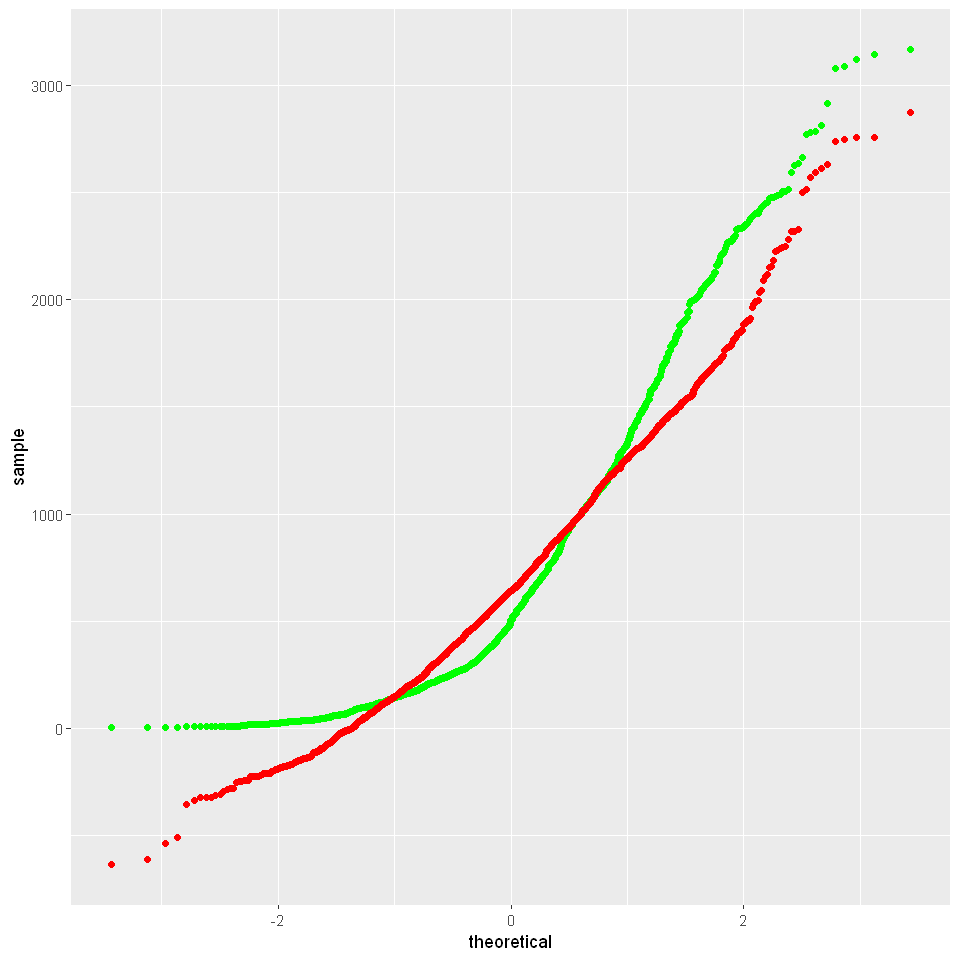

In [221]:
options(repr.plot.width=8, repr.plot.height=8)

ggplot(test_result3)+
    stat_qq(aes(sample=truth),color='green')+
    stat_qq(aes(sample=.pred),color='red')
